<a href="https://colab.research.google.com/github/subhparasara/subhparasara/blob/TIDC_NTU/my_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
LHAPDF_VERSION = '6.5.4'
SITE_PACKGE_DIR = __import__('site').getsitepackages()[0]
PWD = __import__('os').getcwd()
PYTHON_VERSION = '%s.%s' % __import__('sys').version_info[0:2]
!wget https://lhapdf.hepforge.org/downloads/?f=LHAPDF-{LHAPDF_VERSION}.tar.gz -O LHAPDF-{LHAPDF_VERSION}.tar.gz
!tar xf LHAPDF-{LHAPDF_VERSION}.tar.gz
!cd LHAPDF-{LHAPDF_VERSION} && ./configure
!make -C LHAPDF-{LHAPDF_VERSION} -j 2
!make -C LHAPDF-{LHAPDF_VERSION} install
!cd {SITE_PACKGE_DIR} && ln -s {PWD}/LHAPDF-{LHAPDF_VERSION}/wrappers/python/NONE/local/lib/python{PYTHON_VERSION}/dist-packages/lhapdf
!cd /usr/lib && ln -s {PWD}/LHAPDF-{LHAPDF_VERSION}/src/.libs/libLHAPDF.so
!lhapdf update

--2023-08-29 01:25:41--  https://lhapdf.hepforge.org/downloads/?f=LHAPDF-6.5.4.tar.gz
Resolving lhapdf.hepforge.org (lhapdf.hepforge.org)... 129.234.186.186
Connecting to lhapdf.hepforge.org (lhapdf.hepforge.org)|129.234.186.186|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/x-gzip]
Saving to: ‘LHAPDF-6.5.4.tar.gz’

LHAPDF-6.5.4.tar.gz     [   <=>              ] 849.32K  1.17MB/s    in 0.7s    

2023-08-29 01:25:44 (1.17 MB/s) - ‘LHAPDF-6.5.4.tar.gz’ saved [869707]

checking for a BSD-compatible install... /usr/bin/install -c
checking whether build environment is sane... yes
checking for a race-free mkdir -p... /usr/bin/mkdir -p
checking for gawk... no
checking for mawk... mawk
checking whether make sets $(MAKE)... yes
checking whether make supports nested variables... yes
checking whether make supports nested variables... (cached) yes
checking for sw_vers... no
checking whether make supports the include directive... yes (GNU style)
c

In [ ]:
import lhapdf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
!lhapdf install cteq6l1

PDF already installed: cteq6l1 (use --upgrade to force install)


flavor: [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5, 21]


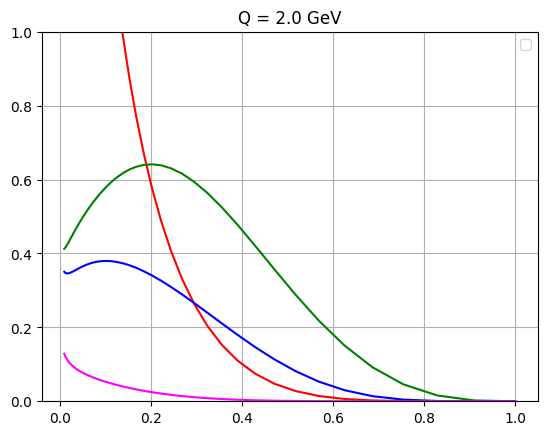

In [ ]:
# call the central number (0) of CTEQ6L1
p = lhapdf.mkPDF("cteq6l1/0")

# let us look at the flavors, they follow convention of particle data group
# d = 1, u = 2, s = 3, c = 4, b = 5, g = 21
print('flavor:', p.flavors())
# lhapdf gives by default - xfxQ2: x * f(x, Q^2)
#                      or - xfxQ:  x * f(x, Q)

q = 2.0
xx = np.geomspace(0.01, 1)
gg = [p.xfxQ(0, x, q) for x in xx]
dd = [p.xfxQ(1, x, q) for x in xx]
uu = [p.xfxQ(2, x, q) for x in xx]
ss = [p.xfxQ(3, x, q) for x in xx]

plt.plot(xx, gg, 'red', label='')
plt.plot(xx, uu, 'green', label='')
plt.plot(xx, dd, 'blue', label='')
plt.plot(xx, ss, 'magenta', label='')
plt.title(f'Q = {q} GeV')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.grid()
plt.ylim(0, 1)
plt.show()
plt.close()

In [ ]:
!lhapdf install MAPFF10NLOPIsum

PDF already installed: MAPFF10NLOPIsum (use --upgrade to force install)


In [ ]:
pisum = lhapdf.mkPDF("MAPFF10NLOPIsum/0")
pisum.flavors()

x = 0.3
Q = 10.0
bbf= pisum.xfxQ(-5, x, Q)/2.0
cbf= pisum.xfxQ(-4, x, Q)/2.0
sbf= pisum.xfxQ(-3, x, Q)/2.0
ubf= pisum.xfxQ(-2, x, Q)/2.0
dbf= pisum.xfxQ(-1, x, Q)/2.0
df = pisum.xfxQ(1, x, Q)/2.0
uf = pisum.xfxQ(2, x, Q)/2.0
sf = pisum.xfxQ(3, x, Q)/2.0
cf = pisum.xfxQ(4, x, Q)/2.0
bf = pisum.xfxQ(5, x, Q)/2.0
gf = pisum.xfxQ(21, x, Q)/2.0
print('%0.2e, %0.2e, %0.2e, %0.2e, %0.2e' %(bbf,cbf,sbf,ubf,dbf))
print('%0.2e, %0.2e, %0.2e, %0.2e, %0.2e, %0.2e' %(df,uf,sf,cf,bf,gf))

1.13e-01, 2.55e-01, 2.73e-01, 2.39e-01, 2.06e-01
2.06e-01, 2.39e-01, 2.73e-01, 2.55e-01, 1.13e-01, 1.19e-01


In [ ]:
# construct light flavor PDFs and FFs
# note: for now, we only need PDFs and FFs of quarks
def PDF(x, Q):
    u = p.xfxQ(2, x, Q)/x
    d = p.xfxQ(1, x, Q)/x
    ub= p.xfxQ(-2, x, Q)/x
    db= p.xfxQ(-1, x, Q)/x
    s = p.xfxQ(3, x, Q)/x
    g = p.xfxQ(21, x, Q)/x

    return u,d,ub,db,s,g

def FF(hh, x, Q):
    fu = hh.xfxQ(2, x, Q)/x/2.0
    fub= hh.xfxQ(-2, x, Q)/x/2.0
    fd = hh.xfxQ(1, x, Q)/x/2.0
    fdb= hh.xfxQ(-1, x, Q)/x/2.0
    fs = hh.xfxQ(3, x, Q)/x/2.0
    fsb= hh.xfxQ(-3, x, Q)/x/2.0
    fg = hh.xfxQ(21, x, Q)/x/2.0

    return fu,fub,fd,fdb,fs,fsb,fg

In [ ]:
!pip install vegas

In [ ]:
def alpha(Q):
    mb = 4.5
    if(Q <= mb):
        nf = 4
        lam_QCD = 0.215
    else:
        nf = 5
        lam_QCD = 0.165

    b0 = 11.0 - 2.0/3.0*nf
    tt = 2.0*np.log(Q/lam_QCD)
    return 4.0*np.pi/(b0*tt)

In [ ]:
def Upp(s, t, u):
    Nc = 3.0
#   qq' --> qq'
    WQ1=(Nc**2-1.0)/(2.0*Nc**2)*(s*s+u*u)/(t*t)
#   qq  ->qq
    WQ2=(Nc**2-1.0)/(2.0*Nc**2)*( (s*s+u*u)/(t*t)+(s*s+t*t)/(u*u) ) \
         -(Nc**2-1.0)/(Nc**3)*(s*s)/(t*u)
#   qqb ->q'qb'
    WQ3=(Nc**2-1.0)/(2.0*Nc**2)*(t*t+u*u)/(s*s)
#   qqb ->qqb
    WQ4=(Nc**2-1.0)/(2.0*Nc**2)*( (s*s+u*u)/(t*t)+(t*t+u*u)/(s*s) ) \
        -(Nc**2-1.0)/(Nc**3)*(u*u)/(s*t)
#   qqb ->gg
    WQ5=(Nc**2-1.0)**2/(2.0*Nc**3)*(u/t+t/u) \
    -(Nc**2-1.0)/Nc*(t*t+u*u)/(s*s)
#   gg  ->qqb
    WQ6=1.0/(2.0*Nc)*(t/u+u/t)-Nc/(Nc**2-1.0)*(t*t+u*u)/(s*s)
#   qg  ->qg
    WQ7=(Nc**2-1.0)/(2.0*Nc**2)*(-s/u-u/s)+(s*s+u*u)/(t*t)
#   gg  ->gg
    WQ8=4.0*Nc**2/(Nc**2-1.0)*(3.0-t*u/(s*s)-s*u/(t*t)-s*t/(u*u))

    return WQ1, WQ2, WQ3, WQ4, WQ5, WQ6, WQ7, WQ8

In [ ]:
def sigma(xa, zc, y, roots, pT, scale):
    roots2 = roots**2
    AA=xa*roots2-pT/zc*roots*np.exp(y)
    BB=xa*pT/zc*roots*np.exp(-y)
    xb=BB/AA

    sh=xa*xb*roots2
    uh=-pT/zc*xb*roots*np.exp(y)
    th=-pT/zc*xa*roots*np.exp(-y)

    if(xa < 1. and xa > 0. and xb < 1. and xb > 0. and zc < 1. and zc > 0.):
        U1,D1,UB1,DB1,S1,GL1 = PDF(xa, scale)
        U2,D2,UB2,DB2,S2,GL2 = PDF(xb, scale)
        fu,fub,fd,fdb,fs,fsb,fg = FF(pisum, zc, scale)
        WQ1,WQ2,WQ3,WQ4,WQ5,WQ6,WQ7,WQ8 = Upp(sh,th,uh)
        WT1,WT2,WT3,WT4,WT5,WT6,WT7,WT8 = Upp(sh,uh,th)

        SIG1=WQ2*(U1*U2*fu+UB1*UB2*fub+D1*D2*fd+DB1*DB2*fdb+S1*S2*fs+S1*S2*fsb) \
            +WQ3*(U1*UB2*(fd+fs)+D1*DB2*(fu+fs)+S1*S2*(fu+fd) \
            +UB1*U2*(fdb+fsb)+DB1*D2*(fub+fsb)+S1*S2*(fub+fdb)) \
            +WT3*(UB1*U2*(fd+fs)+DB1*D2*(fu+fs)+S1*S2*(fu+fd) \
            +U1*UB2*(fdb+fsb)+D1*DB2*(fub+fsb)+S1*S2*(fub+fdb))

        SIG2=WQ4*(U1*UB2*fu+D1*DB2*fd+S1*S2*fs+UB1*U2*fub+DB1*D2*fdb+S1*S2*fsb) \
            +WT4*(UB1*U2*fu+DB1*D2*fd+S1*S2*fs+U1*UB2*fub+D1*DB2*fdb+S1*S2*fsb) \
            +WQ1*(U1*(D2+DB2+S2+S2)*fu+D1*(U2+UB2+S2+S2)*fd+UB1*(D2+DB2+S2+S2)*fub \
            +DB1*(U2+UB2+S2+S2)*fdb+S1*(U2+UB2+D2+DB2)*fs+S1*(U2+UB2+D2+DB2)*fsb)

        SIG3=WT1*((D1+DB1+S1+S1)*U2*fu+(U1+UB1+S1+S1)*D2*fd \
            +(D1+DB1+S1+S1)*UB2*fub+(U1+UB1+S1+S1)*DB2*fdb \
            +(U1+UB1+D1+DB1)*S2*fs+(U1+UB1+D1+DB1)*S2*fsb) \
            +WQ5*(U1*UB2+D1*DB2+S1*S2)*fg+WT5*(UB1*U2+DB1*D2+S1*S2)*fg

        SIG4=WQ6*GL1*GL2*(fu+fd+fs)+WT6*GL1*GL2*(fub+fdb+fsb) \
            +WQ7*(GL2*(U1*fu+D1*fd+S1*fs+UB1*fub+DB1*fdb+S1*fsb) \
            +GL1*fg*(U2+UB2+D2+DB2+S2+S2)) \
            +WT7*(GL1*(U2*fu+D2*fd+S2*fs+UB2*fub+DB2*fdb+S2*fsb) \
            +GL2*fg*(U1+UB1+D1+DB1+S1+S1)) \
            +WQ8*GL1*GL2*fg

        SIG=SIG1+SIG2+SIG3+SIG4

        sigma = 1./xa/(zc*zc)/BB*SIG*alpha(scale)**2/roots2
    else:
        sigma = 0.

    return sigma

In [ ]:
import vegas

In [ ]:
def dist_vegas(roots, pT, scale):
    convert = 0.389
    def cross_before(val):
        xa = val[0]
        zc = val[1]
        y  = val[2]
        return sigma(xa, zc, y, roots, pT, scale)

    ymin = -0.35; ymax = 0.35; dY = ymax - ymin
    integ = vegas.Integrator([[0, 1], [0, 1], [ymin, ymax]])
    result = integ(cross_before, nitn=10, neval=10000)
    return convert/dY*result.mean

In [ ]:
roots = 200.
pT_a = [1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5]
num0 = len(pT_a)
cross = [0.]*num0
for i in range(num0):
    pT = pT_a[i]
    scale = pT
    cross[i] = dist_vegas(roots, pT, scale)
    print('%0.3e\t %0.3e' %(pT, cross[i]))

1.500e+00	 7.841e-02
2.500e+00	 2.993e-03
3.500e+00	 2.907e-04
4.500e+00	 4.706e-05
5.500e+00	 1.053e-05
6.500e+00	 2.927e-06
7.500e+00	 9.521e-07
8.500e+00	 3.500e-07
9.500e+00	 1.407e-07
1.050e+01	 6.119e-08
1.150e+01	 2.830e-08
1.250e+01	 1.376e-08
1.350e+01	 7.008e-09
1.450e+01	 3.701e-09
1.550e+01	 2.016e-09
1.650e+01	 1.127e-09
1.750e+01	 6.482e-10
1.850e+01	 3.802e-10
1.950e+01	 2.276e-10


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/TIDC_Autumn_School_NTU/TIDC_NTU')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.DataFrame({
    "pT": pT_a,
    "cross": cross})
df.to_csv('python_thy.csv', index=False)

# prepare for plots
python_thy = pd.read_csv('python_thy.csv')
python_thy.head()

,pT,cross
0,1.5,0.078407
1,2.5,0.002993
2,3.5,0.000291
3,4.5,0.000047
4,5.5,0.000011


In [ ]:
# set the font globally
# by default, I typically use font "Times New Roman".
# However, usually at Linux, such a font is not available (unless you install).
# so you need to use an alternative version that is very close to Times New Roman.
# such a font exists at Linux, it is "Liberation Serif".
# So if I am using it at Mac, you will see I am using "Times New Roman"; at Linux, I am using "Liberation Serif".
plt.rcParams.update({'font.family':'Liberation Serif', 'mathtext.fontset':'stix', 'mathtext.default':'rm', 'font.size':18, 'lines.linewidth': 2})

In [20]:
# experimental data, to compare with theory
data = pd.read_csv('/content/drive/MyDrive/TIDC_Autumn_School_NTU/TIDC_NTU/pi0_phenix_200.dat',sep='\s+',header=None)
data = pd.DataFrame(data)

x = data[0]
y = data[1]
num2 = len(x)
yerr = np.sqrt(data[2]**2+data[3]**2)
for i in range(num2):
    print('%0.3e\t %0.3e\t %0.3e' %(x[i], y[i], yerr[i]))

plt.figure(figsize=(6, 6))
plt.yscale('log')
plt.tick_params(axis='both', which='both', direction='in')
plt.xlabel('$p_T$ (GeV)')
plt.ylabel('$d\sigma/dyd^2p_T$ ($mb\cdot GeV^{-2}$)')
plt.xlim(0,20)
plt.ylim(1.1e-10,1e2)

# plot experimental data points
plt.errorbar(x, y, yerr = yerr, fmt = 'ro', label='$\pi^0$ PHENIX', capsize=3, markersize = 6)

# plot theory as curve
x_val = python_thy["pT"]
# over here, I added this "multiply()" function to just show
# that pandas has this feature to multiply each element of the column
y_val = python_thy["cross"].multiply(1.0)
plt.plot(x_val, y_val, 'b-')

plt.legend(frameon=False)
plt.text(10, 0.05, '$\sqrt{s} = 200$ GeV \n |y| < 0.35')
plt.savefig('RHIC_pp.pdf', bbox_inches='tight')
plt.show()

FileNotFoundError: ignored